In [51]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib
import gsw

In [2]:
import filt_funcs as ff
import EV_funcs as ef

# Load boxes, process xarrays

In [5]:
s_ds=xr.open_dataset("202206/202206_lon:(25,45)_lat:(-60,-50).nc")
s = ff.get_ds_interp(s_ds,0,2000,4)

In [6]:
s1 = s.where(s.TIME.dt.month>0).where(s.TIME.dt.month<4)
s2 = s.where(s.TIME.dt.month>3).where(s.TIME.dt.month<7)
s3 = s.where(s.TIME.dt.month>6).where(s.TIME.dt.month<10)
s4 = s.where(s.TIME.dt.month>9).where(s.TIME.dt.month<13)

s1_SIG0_EV = ef.get_eddy_variance(s1,100,variable='SIG0')
s2_SIG0_EV = ef.get_eddy_variance(s2,100,variable='SIG0')
s3_SIG0_EV = ef.get_eddy_variance(s3,100,variable='SIG0')
s4_SIG0_EV = ef.get_eddy_variance(s4,100,variable='SIG0')

In [7]:
so1_ds = xr.open_dataset("202206/202206_lon:(120,130)_lat:(-60,-55).nc")
so1 = ff.get_ds_interp(so1_ds,0,2000,4)
so2_ds = xr.open_dataset("202206/202206_lon:(60,70)_lat:(-60,-55).nc")
so2 = ff.get_ds_interp(so2_ds,0,2000,4)
so3_ds = xr.open_dataset("202206/202206_lon:(0,10)_lat:(-60,-55).nc")
so3 = ff.get_ds_interp(so3_ds,0,2000,4)
so4_ds = xr.open_dataset("202206/202206_lon:(-60,-50)_lat:(-60,-55).nc")
so4 = ff.get_ds_interp(so4_ds,0,2000,4)
so5_ds = xr.open_dataset("202206/202206_lon:(-120,-110)_lat:(-60,-55).nc")
so5 = ff.get_ds_interp(so5_ds,0,2000,4)
so6_ds = xr.open_dataset("202206/202206_lon:(-180,-170)_lat:(-60,-55).nc")
so6 = ff.get_ds_interp(so6_ds,0,2000,4)

In [8]:
so1_SIG0_EV = ef.get_eddy_variance(so1, 100, variable='SIG0')
so2_SIG0_EV = ef.get_eddy_variance(so2, 100, variable='SIG0')
so3_SIG0_EV = ef.get_eddy_variance(so3, 100, variable='SIG0')
so4_SIG0_EV = ef.get_eddy_variance(so4, 100, variable='SIG0')
so5_SIG0_EV = ef.get_eddy_variance(so5, 100, variable='SIG0')
so6_SIG0_EV = ef.get_eddy_variance(so6, 100, variable='SIG0')

In [9]:
np_ds=xr.open_dataset("202206/202206_lon:(-155,-145)_lat:(30,35).nc")
np = ff.get_ds_interp(np_ds,0,2000,4)
na_ds=xr.open_dataset("202206/202206_lon:(-55,-45)_lat:(40,45).nc")
na = ff.get_ds_interp(na_ds,0,2000,4)
so_ds=xr.open_dataset("202206/202206_lon:(30,40)_lat:(-55,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)
io_ds=xr.open_dataset("202206/202206_lon:(90,100)_lat:(-15,-10).nc")
io = ff.get_ds_interp(io_ds,0,2000,4)

In [11]:
np_SIG0_EV = ef.get_eddy_variance(np, 100, variable='SIG0')
na_SIG0_EV = ef.get_eddy_variance(na, 100, variable='SIG0')
so_SIG0_EV = ef.get_eddy_variance(so, 100, variable='SIG0')
io_SIG0_EV = ef.get_eddy_variance(io, 100, variable='SIG0')

### Normalized density function

In [12]:
def normalized_EV_plot(ds,ds_EV,roll=7):

    drho_dz = ds.SIG0.rolling(PRES_INTERPOLATED=roll).mean().rolling(PRES_INTERPOLATED=roll).mean().diff('PRES_INTERPOLATED')/2

    return ((ds_EV/drho_dz**2)**(1/2)).rolling(PRES_INTERPOLATED=roll).mean().rolling(PRES_INTERPOLATED=roll).mean()


In [13]:
s1_SIG0_NEV = normalized_EV_plot(s1, s1_SIG0_EV)
s2_SIG0_NEV = normalized_EV_plot(s2, s2_SIG0_EV)
s3_SIG0_NEV = normalized_EV_plot(s3, s3_SIG0_EV)
s4_SIG0_NEV = normalized_EV_plot(s4, s4_SIG0_EV)

In [14]:
so1_SIG0_NEV = normalized_EV_plot(so1, so1_SIG0_EV)
so2_SIG0_NEV = normalized_EV_plot(so2, so2_SIG0_EV)
so3_SIG0_NEV = normalized_EV_plot(so3, so3_SIG0_EV)
so4_SIG0_NEV = normalized_EV_plot(so4, so4_SIG0_EV)
so5_SIG0_NEV = normalized_EV_plot(so5, so5_SIG0_EV)
so6_SIG0_NEV = normalized_EV_plot(so6, so6_SIG0_EV)

In [15]:
na_SIG0_NEV = normalized_EV_plot(na, na_SIG0_EV)
np_SIG0_NEV = normalized_EV_plot(np, np_SIG0_EV)
so_SIG0_NEV = normalized_EV_plot(so, so_SIG0_EV)
io_SIG0_NEV = normalized_EV_plot(io, io_SIG0_EV)

### Compute spice

In [16]:
s1['SPICE'] = gsw.spiciness0(s1.SA,s1.CT).rename('SPICE')
s2['SPICE'] = gsw.spiciness0(s2.SA,s2.CT).rename('SPICE')
s3['SPICE'] = gsw.spiciness0(s3.SA,s3.CT).rename('SPICE')
s4['SPICE'] = gsw.spiciness0(s4.SA,s4.CT).rename('SPICE')

In [47]:
s1_SPICE_EV = ef.get_eddy_variance(s1, 100, variable='SPICE')
s2_SPICE_EV = ef.get_eddy_variance(s2, 100, variable='SPICE')
s3_SPICE_EV = ef.get_eddy_variance(s3, 100, variable='SPICE')
s4_SPICE_EV = ef.get_eddy_variance(s4, 100, variable='SPICE')

In [17]:
so1['SPICE'] = gsw.spiciness0(so1.SA,so1.CT).rename('SPICE')
so2['SPICE'] = gsw.spiciness0(so2.SA,so2.CT).rename('SPICE')
so3['SPICE'] = gsw.spiciness0(so3.SA,so3.CT).rename('SPICE')
so4['SPICE'] = gsw.spiciness0(so4.SA,so4.CT).rename('SPICE')
so5['SPICE'] = gsw.spiciness0(so5.SA,so5.CT).rename('SPICE')
so6['SPICE'] = gsw.spiciness0(so6.SA,so6.CT).rename('SPICE')

In [48]:
so1_SPICE_EV = ef.get_eddy_variance(so1, 100, variable='SPICE')
so2_SPICE_EV = ef.get_eddy_variance(so2, 100, variable='SPICE')
so3_SPICE_EV = ef.get_eddy_variance(so3, 100, variable='SPICE')
so4_SPICE_EV = ef.get_eddy_variance(so4, 100, variable='SPICE')

In [18]:
np['SPICE'] = gsw.spiciness0(np.SA,np.CT).rename('SPICE')
na['SPICE'] = gsw.spiciness0(na.SA,na.CT).rename('SPICE')
so['SPICE'] = gsw.spiciness0(so.SA,so.CT).rename('SPICE')
io['SPICE'] = gsw.spiciness0(io.SA,io.CT).rename('SPICE')

In [49]:
np_SPICE_EV = ef.get_eddy_variance(np, 100, variable='SPICE')
na_SPICE_EV = ef.get_eddy_variance(na, 100, variable='SPICE')
so_SPICE_EV = ef.get_eddy_variance(so, 100, variable='SPICE')
io_SPICE_EV = ef.get_eddy_variance(io, 100, variable='SPICE')

# Methods

In [19]:
A = so1.SIG0.isel(N_PROF=0)
A2 = (so1.SIG0**2).isel(N_PROF=0)
A2l = ef.get_total_variance(so, 100, variable='SIG0').isel(N_PROF=0)

Al = ff.get_filt_single(so, 100, variable='SIG0').isel(N_PROF=0)
Al2 = ef.get_mean_variance(so, 100, variable='SIG0').isel(N_PROF=0)
AEV = ef.get_eddy_variance(so, 100, variable='SIG0').isel(N_PROF=0)

Text(0.5, 1.0, 'A')

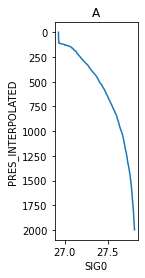

In [20]:
plt.figure(figsize=(1.5,4))
A.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('A')

Text(0.5, 1.0, 'A^2')

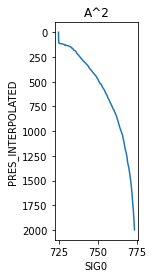

In [21]:
plt.figure(figsize=(1.5,4))
A2.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('A^2')

Text(0.5, 1.0, '<A^2>')

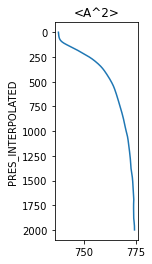

In [22]:
plt.figure(figsize=(1.5,4))
A2l.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A^2>')

Text(0.5, 1.0, '<A>')

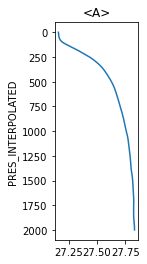

In [23]:
plt.figure(figsize=(1.5,4))
Al.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A>')

Text(0.5, 1.0, '<A>^2')

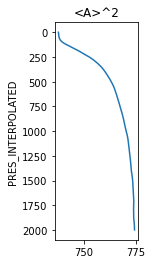

In [24]:
plt.figure(figsize=(1.5,4))
Al2.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A>^2')

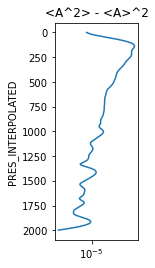

In [25]:
plt.figure(figsize=(1.5,4))
AEV.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A^2> - <A>^2')
plt.xscale('log')

# Results: Density in Depth Space

### Temporal (argo_seasonality)

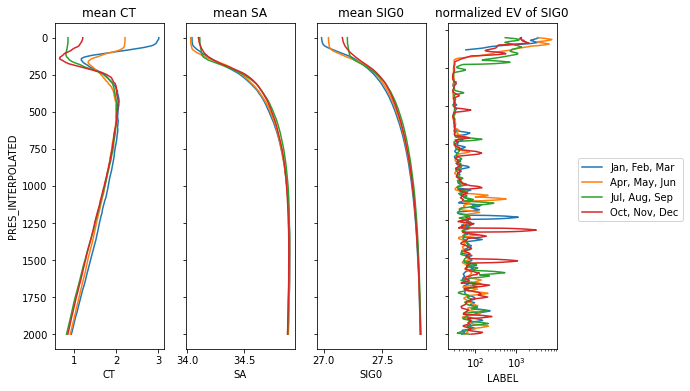

In [54]:
plt.figure(figsize=(9,6))

plt.subplot(1,4,1)
s1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,4,2)
s1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplot(1,4,3)
s1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylabel('')
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplot(1,4,4)
s1_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('normalized EV of SIG0')
plt.ylabel('')
plt.xscale('log')
plt.xlabel('LABEL')
plt.legend(bbox_to_anchor=(2.2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplots_adjust(wspace=0.2)

### Spatial Southern Ocean (argo_one_scale)

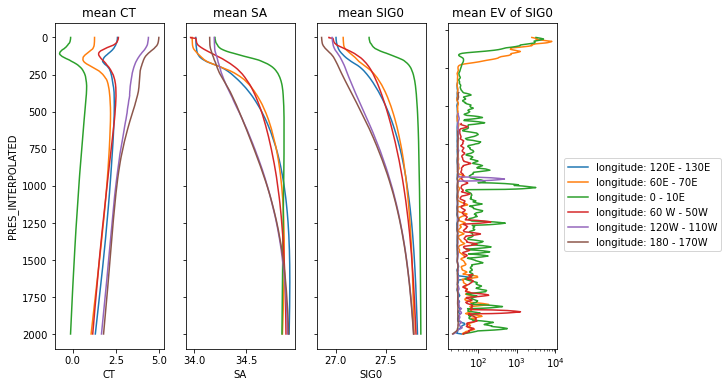

In [55]:
plt.figure(figsize=(9,6))

plt.subplot(1,4,1)
so1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120E - 130E')
so2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60E - 70E')
so3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 0 - 10E')
so4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60 W - 50W')
so5.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120W - 110W')
so6.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 180 - 170W')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,4,2)
so1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120E - 130E')
so2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60E - 70E')
so3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 0 - 10E')
so4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60 W - 50W')
so5.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120W - 110W')
so6.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 180 - 170W')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplot(1,4,3)
so1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120E - 130E')
so2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60E - 70E')
so3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 0 - 10E')
so4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60 W - 50W')
so5.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120W - 110W')
so6.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 180 - 170W')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylabel('')
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplot(1,4,4)
so1_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120E - 130E')
so2_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60E - 70E')
so3_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 0 - 10E')
so4_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 60 W - 50W')
so5_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 120W - 110W')
so6_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='longitude: 180 - 170W')
plt.gca().invert_yaxis()
plt.title('mean EV of SIG0')
plt.ylabel('')
plt.xscale('log')
plt.legend(bbox_to_anchor=(2.55, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplots_adjust(wspace=0.2)

### Spatial: Four Boxes (argo_one_scale)

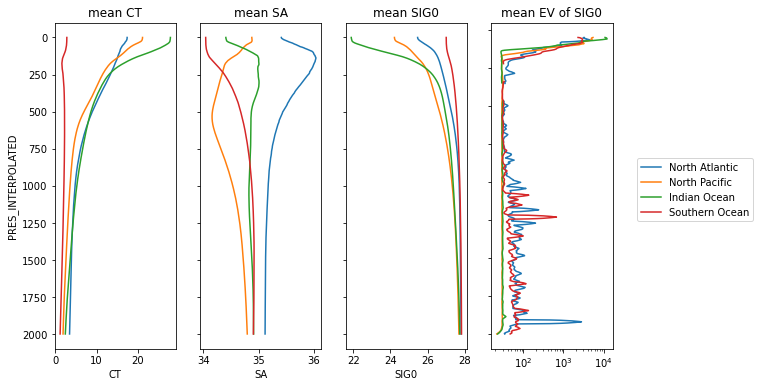

In [56]:
plt.figure(figsize=(10,6))

plt.subplot(1,4,1)
na.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
np.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
io.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
so.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,4,2)
na.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
np.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
io.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
so.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplot(1,4,3)
na.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
np.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
io.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
so.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylabel('')
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplot(1,4,4)
na_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
np_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
io_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
so_SIG0_NEV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
plt.gca().invert_yaxis()
plt.title('mean EV of SIG0')
plt.ylabel('')
plt.xscale('log')
plt.legend(bbox_to_anchor=(2.2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))

plt.subplots_adjust(wspace=0.2)

# Results: Spice in Depth Space